In [59]:
import requests

In [61]:
resp = requests.get('https://ya.ru')
resp

<Response [200]>

In [63]:
resp.text

'<!DOCTYPE html><html class="i-ua_js_no i-ua_css_standart i-ua_browser_unknown i-ua_browser-engine_unknown i-ua_browser_desktop i-ua_platform_other" lang="ru"><head xmlns:og="http://ogp.me/ns#"><meta http-equiv=Content-Type content="text/html;charset=UTF-8"><meta http-equiv="X-UA-Compatible" content="IE=edge"><title>Яндекс</title><link rel="shortcut icon" href="//yastatic.net/s3/home-static/_/a6/a6a296b741b51880ae8a9b04a67cfe3f.png" sizes="16x16"><link rel="shortcut icon" href="//yastatic.net/s3/home-static/_/f4/f47b1b3d8194c36ce660324ab55a04fe.png" sizes="32x32"><link rel="shortcut icon" href="//yastatic.net/s3/home-static/_/f0/f0597b6727cc67dceebc4e3a87caf571.png" sizes="192x192"><link rel="apple-touch-icon" href="//yastatic.net/s3/home-static/_/31/3111cd045f263a072f504780b8535840.png" sizes="76x76"><link rel="apple-touch-icon" href="//yastatic.net/s3/home-static/_/a2/a27610a94f8a0827a6a937c869d95a3e.png" sizes="120x120"><link rel="apple-touch-icon" href="//yastatic.net/s3/home-stati

In [64]:
resp = requests.get('https://api.hh.ru/vacancies/99')

In [67]:
resp.json()['salary']['to']

2000

In [68]:
resp = requests.get('https://kommersant.ru')
resp

<Response [200]>

# Парсинг
Достанем из архива газеты «Коммерсант» новости спорта и культуры

# Этапы

Задача разбивается на 2 части:
<ol>
    <li>Вытащим из архива URL конкретных новостей</li>
    <li>Пройдёмся по страницам конкретных новостей и соберем их заголовки, даты и тексты</li>
</ol>

In [69]:
#культура
url1 = 'https://kommersant.ru/archive/rubric/8/month'
#спорт
url2 = 'https://kommersant.ru/archive/rubric/9/month'

In [70]:
# новостей с начала года нам достаточно
url_suffix = ['', '//2020-03-01', '//2020-02-01','//2020-01-01']
#url_suffix = ['']

In [71]:
#tqdm
parse_cult = []

for suff in url_suffix:
    parse_cult.append(
        requests.get(url1 + suff)
    )

In [72]:
#tqdm
parse_sport = []

for suff in url_suffix:
    parse_sport.append(
        requests.get(url2 + suff)
    )

In [73]:
import bs4

def get_links(text):

    soup = bs4.BeautifulSoup(text,'lxml')       
    link_divs = soup.findAll('div',{'class': 'archive_result__item_text'})
    return [[link.find('a')['href'], link.find('h3',{'class': 'article_name'}).text] for link in link_divs] if not None else []

In [74]:
links_cult  = sum([get_links(elem.text) for elem in parse_cult], [])
links_sport = sum([get_links(elem.text) for elem in parse_sport], [])

In [75]:
len(links_sport), len(links_cult), links_cult[0]

(1090, 571, ['/doc/4780210', 'Дирижерская социалочка'])

In [76]:
main_url = 'https://kommersant.ru'
main_url + links_cult[0][0]

'https://kommersant.ru/doc/4780210'

## Разбор текста конкретной новости

In [77]:
from tqdm import tqdm_notebook as tqdm

In [78]:
a = requests.get(main_url + links_cult[0][0]).text

In [80]:
a

'\r\n<!DOCTYPE html>\r\n<html class="no-js" lang="ru" prefix="og: http://ogp.me/ns# article: http://ogp.me/ns/article#" >\r\n<head>\r\n<title>Дирижерская социалочка – Газета Коммерсантъ № 68 (7030) от 17.04.2021</title>\r\n<meta http-equiv="X-UA-Compatible" content="IE=edge, chrome=1" />\r\n<meta charset="utf-8"/>\r\n\r\n    <meta name="viewport" content="width=device-width, initial-scale=1.0">\r\n    <script> if (document.cookie.indexOf(\'IsNonMobileViewport\') >= 0){document.write(\'<meta name="viewport" content="width=1200">\')}</script>\r\n\r\n<meta name="format-detection" content="telephone=no" />\r\n<meta name="title" content="Дирижерская социалочка - Густаво Дудамель станет музыкальным руководителем Парижской оперы - Газета &quot;Коммерсантъ&quot; - Коммерсантъ: последние новости России и мира" />\r\n\r\n<meta name="description" content="Новый директор Парижской оперы Александр Неф продолжает собирать свою команду. 16 апреля он объявил имя нового музыкального руководителя театра

In [81]:
main_url + links_cult[0][0]

'https://kommersant.ru/doc/4780210'

In [82]:
soup = bs4.BeautifulSoup(a,'lxml')
soup.find('meta',{'name': 'description'})['content'], soup.find('meta',{'property': 'article:published_time'})['content']

('Новый директор Парижской оперы Александр Неф продолжает собирать свою команду. 16 апреля он объявил имя нового музыкального руководителя театра. Им станет 40-летний венесуэльский маэстро Густаво Дудамель, возможно, самый яркий, необычный и знаменитый дирижер своего поколения. Официально вступит в должность он 1 августа 2021 года, а контракт пока рассчитан на шесть сезонов. Рассказывает Мария Сидельникова.',
 '2021-04-17T00:00:00+03:00')

In [85]:
#a = requests.get('https://www.kommersant.ru/doc/4215266').text
soup = bs4.BeautifulSoup(a,'lxml')
soup.find('div',{'class': 'article_text_wrapper'}).text

'\nНовый директор Парижской оперы Александр Неф продолжает собирать свою команду. 16 апреля он объявил имя нового музыкального руководителя театра. Им станет 40-летний венесуэльский маэстро Густаво Дудамель, возможно, самый яркий, необычный и знаменитый дирижер своего поколения. Официально вступит в должность он 1 августа 2021 года, а контракт пока рассчитан на шесть сезонов. Рассказывает Мария Сидельникова.\nКогда Александр Неф осенью преждевременно заступил на пост гендиректора Парижской оперы, ее музыкальный руководитель Филипп Жордан уже объявил о своем переезде в Вену. После 12 лет в Опере швейцарский маэстро попрощается с парижской публикой 2\xa0июля — живьем или в трансляции. Поисками его преемника, по идее, должен был заниматься уходящий интендант Стефан Лисснер, но тот логично рассудил, что работать с новым музыкальным руководителем новому директору, значит, ему и решать этот кадровый ребус в кратчайшие сроки и в непростой ковидный год. И решил его Александр Неф, надо признать

In [86]:
from datetime import datetime 

def get_date(text_date):
    date = datetime.strptime(text_date[:10],'%Y-%m-%d')
    return '{}-{:02d}-{:02d}'.format(date.year,date.month,date.day)

In [87]:
def parse_news(text):

    soup = bs4.BeautifulSoup(text,'lxml')       
    return [
        #soup.find('meta',{'name': 'description'})['content'], 
        soup.find('div',{'class': 'article_text_wrapper'}).text, 
            get_date(soup.find('meta',{'property': 'article:published_time'})['content'])
    ]

In [88]:
parse_news(a)
b = [links_cult[0][1]]
b.extend(parse_news(a))
b

['Дирижерская социалочка',
 '\nНовый директор Парижской оперы Александр Неф продолжает собирать свою команду. 16 апреля он объявил имя нового музыкального руководителя театра. Им станет 40-летний венесуэльский маэстро Густаво Дудамель, возможно, самый яркий, необычный и знаменитый дирижер своего поколения. Официально вступит в должность он 1 августа 2021 года, а контракт пока рассчитан на шесть сезонов. Рассказывает Мария Сидельникова.\nКогда Александр Неф осенью преждевременно заступил на пост гендиректора Парижской оперы, ее музыкальный руководитель Филипп Жордан уже объявил о своем переезде в Вену. После 12 лет в Опере швейцарский маэстро попрощается с парижской публикой 2\xa0июля — живьем или в трансляции. Поисками его преемника, по идее, должен был заниматься уходящий интендант Стефан Лисснер, но тот логично рассудил, что работать с новым музыкальным руководителем новому директору, значит, ему и решать этот кадровый ребус в кратчайшие сроки и в непростой ковидный год. И решил его 

In [89]:
import warnings
warnings.filterwarnings('ignore')

In [90]:
news_cult = []
for el in tqdm(links_cult):
    tmp = [main_url + el[0], el[1]]
    tmp.extend(parse_news(requests.get(main_url + el[0]).text))
    news_cult.append(tmp)

In [91]:
news_sport = []
for el in tqdm(links_sport):
    tmp = [main_url + el[0], el[1]]
    tmp.extend(parse_news(requests.get(main_url + el[0]).text))
    news_sport.append(tmp)

KeyboardInterrupt: 

In [ ]:
len(news_cult), len(news_sport)

In [ ]:
import pickle

In [ ]:
with open('/tmp/news_dicts.pkl', 'wb') as f:
    pickle.dump([news_cult, news_sport], f)

In [ ]:
with open('news_dicts.pkl', 'wb') as f:
    pickle.dump([news_cult, news_sport], f)

In [92]:
import pickle
with open('news_dicts.pkl', 'rb') as f:
    data = pickle.load(f)

In [97]:
len(data[1])

1090

In [95]:
data[0][0][2]

'\nВ прокат вышел фильм Стефано Чипани «Мой брат — супергерой!» (Mio fratello rincorre i dinosauri), премьера которого состоялась в программе «Авторские дни» Венецианского кинофестиваля 2019 года. Несмотря на то что один из героев ленты — особенный ребенок, в ней самой ничего особенного нет, считает Юлия Шагельман.\nФильм, который в оригинале называется «Мой брат гоняется за динозаврами»,— первая полнометражная режиссерская работа Стефано Чипани (сам он появляется в картине в маленькой эпизодической роли барабанщика школьной группы). В основу сценария, написанного Фабио Бонифаччи, набившим руку на специфически итальянских комедиях, легла автобиографическая книга Джакомо Маццариола, изданная в 2016 году и ставшая на родине книгоиздательской сенсацией. В первый год было продано 250\xa0тыс. экземпляров этого немудрящего мемуара двадцатидвухлетнего тогда автора о его семье, младшем брате с синдромом Дауна и о том, чему сам Джакомо научился благодаря отношениям с ним.\nЗрители знакомятся с 

In [98]:
texts = []
for el in data[0]:
    texts.append(el[2])
for el in data[1]:
    texts.append(el[2])

In [ ]:
texts = []
for el in news_cult:
    texts.append(el[2])
for el in news_sport:
    texts.append(el[2])

In [99]:
len(texts), len(data[0]), len(data[1])

(1734, 644, 1090)

In [100]:
data[0][-1]

['https://kommersant.ru/doc/4214491',
 'Фильм «Холоп» собрал в прокате более 1 млрд рублей',
 '\nРоссийский фильм «Холоп», вышедший 26 декабря, собрал в прокате более 1 млрд руб., следует из данных Единой федеральной автоматизированной информационной системы (ЕАИС). За это время фильм посмотрели почти 1,5 млн человек. \nСогласно ЕАИС, в день премьеры кассовые сборы фильма составили 46,4 млн руб., в первый уикенд — 303 млн руб., во второй уикенд — 483,5 млн руб.\nПодробнее о «Холопе» — в материале “Ъ” «Кнут по ветру».\nПрокатная десятка\n\n\n\n\n\n\nЧто посмотреть в кино на новогодних выходныхЧитать далее \n',
 '2020-01-04']

In [ ]:
data[0][-20]

In [101]:
texts[len(data[0]) - 1], texts[len(data[0])]

('\nРоссийский фильм «Холоп», вышедший 26 декабря, собрал в прокате более 1 млрд руб., следует из данных Единой федеральной автоматизированной информационной системы (ЕАИС). За это время фильм посмотрели почти 1,5 млн человек. \nСогласно ЕАИС, в день премьеры кассовые сборы фильма составили 46,4 млн руб., в первый уикенд — 303 млн руб., во второй уикенд — 483,5 млн руб.\nПодробнее о «Холопе» — в материале “Ъ” «Кнут по ветру».\nПрокатная десятка\n\n\n\n\n\n\nЧто посмотреть в кино на новогодних выходныхЧитать далее \n',
 '\nСборная России по футболу разгромила команду Исландии в стартовом матче группового этапа молодежного чемпионата Европы. Встреча в венгерском Дьёре закончилась со счетом 4:1. Это первая победа российской молодежной команды в матче на Евро за последние 23 года.\nГолы забили: Федор Чалов (31-я минута, пенальти), Наир Тикнизян (42), Арсен Захарян (45+2), Денис Макаров (53) — Свейнн Арон Гудьонсен (59).\n28 марта сборная России сыграет с командой Франции в венгерском Сомба

# Обработка текстов

In [102]:
from sklearn.feature_extraction.text import CountVectorizer

In [161]:
import re
GROUPING_SPACE_REGEX = re.compile(r'([^\w]|[+])', re.UNICODE)
def simple_word_tokenize(text, _split=GROUPING_SPACE_REGEX.split):
    return [t for t in _split(text.lower()) if len(t)>1 and not t.isspace()]

In [162]:
import pymorphy2
m = pymorphy2.MorphAnalyzer()

In [163]:
def token_r(text):
    words = simple_word_tokenize(text)
    return [m.parse(x)[0].normal_form for x in words]

In [143]:
cv = CountVectorizer(tokenizer=token_r)

In [136]:
cv = CountVectorizer(analyzer='char_wb', ngram_range=(3,3))

In [137]:
cv.fit_transform(['Не плохой, а хороший','Не хороший, а плохой']).toarray()

array([[1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1]],
      dtype=int64)

In [138]:
cv.vocabulary_

{' не': 1,
 'не ': 8,
 ' пл': 2,
 'пло': 14,
 'лох': 7,
 'охо': 12,
 'хой': 16,
 'ой,': 10,
 'й, ': 6,
 ' а ': 0,
 ' хо': 3,
 'хор': 17,
 'оро': 11,
 'рош': 15,
 'оши': 13,
 'ший': 18,
 'ий ': 4,
 'ий,': 5,
 'ой ': 9}

In [144]:
%%time
matrix = cv.fit_transform(texts).toarray()

CPU times: user 4min 32s, sys: 577 ms, total: 4min 32s
Wall time: 4min 32s


In [145]:
matrix.shape

(1734, 45814)

In [147]:
matrix[0].sum()

735

In [140]:
from sklearn.metrics.pairwise import cosine_similarity

In [149]:
# не расстояние, а косинус угла
cosine_similarity(matrix[0].reshape(1,-1), matrix[0].reshape(1,-1))

array([[1.]])

In [150]:
cos_m = cosine_similarity(matrix[0].reshape(1,-1), matrix[1:])

In [151]:
cos_m.shape

(1, 1733)

In [ ]:
cos_m.argmin()

In [152]:
%matplotlib inline

In [153]:
from matplotlib import pyplot as plt

In [154]:
import numpy as np
def rolling_mean(seq, window=20):
    s = np.insert(np.cumsum(seq), 0, [0])
    return np.hstack((np.full(window - 1, seq[:window].mean()), (s[window :] - s[:-window]) * (1. / window)))

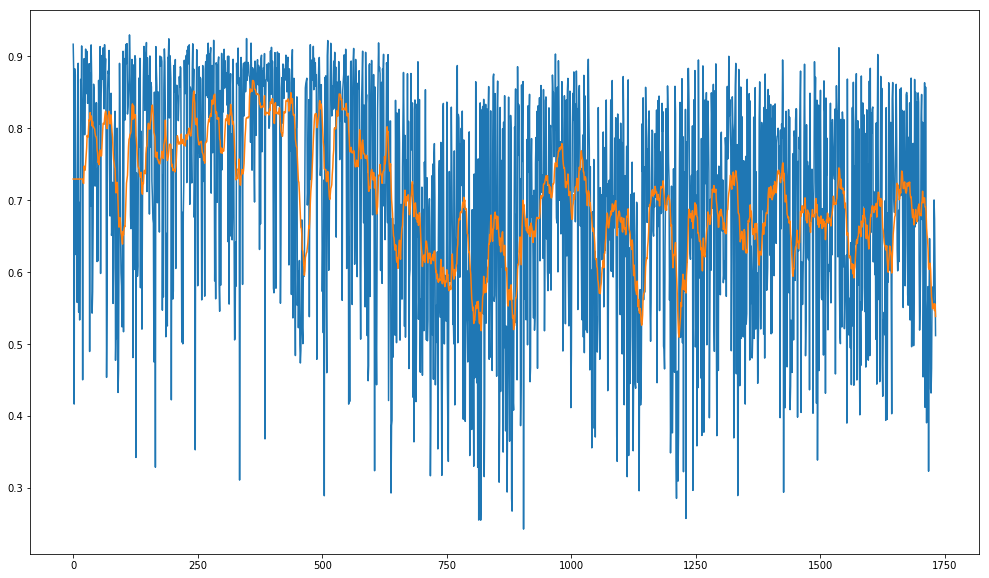

In [155]:
plt.figure(figsize=(17,10))
plt.plot(cos_m[0][1:])
plt.plot(rolling_mean(cos_m[0][1:]));

Особых различий не видно, хотя мы знаем, что они есть. Что будем делать?

Удалим стоп-слова

In [156]:
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
stops = set(stopwords.words('russian'))

In [157]:
stops

{'а',
 'без',
 'более',
 'больше',
 'будет',
 'будто',
 'бы',
 'был',
 'была',
 'были',
 'было',
 'быть',
 'в',
 'вам',
 'вас',
 'вдруг',
 'ведь',
 'во',
 'вот',
 'впрочем',
 'все',
 'всегда',
 'всего',
 'всех',
 'всю',
 'вы',
 'где',
 'да',
 'даже',
 'два',
 'для',
 'до',
 'другой',
 'его',
 'ее',
 'ей',
 'ему',
 'если',
 'есть',
 'еще',
 'ж',
 'же',
 'за',
 'зачем',
 'здесь',
 'и',
 'из',
 'или',
 'им',
 'иногда',
 'их',
 'к',
 'как',
 'какая',
 'какой',
 'когда',
 'конечно',
 'кто',
 'куда',
 'ли',
 'лучше',
 'между',
 'меня',
 'мне',
 'много',
 'может',
 'можно',
 'мой',
 'моя',
 'мы',
 'на',
 'над',
 'надо',
 'наконец',
 'нас',
 'не',
 'него',
 'нее',
 'ней',
 'нельзя',
 'нет',
 'ни',
 'нибудь',
 'никогда',
 'ним',
 'них',
 'ничего',
 'но',
 'ну',
 'о',
 'об',
 'один',
 'он',
 'она',
 'они',
 'опять',
 'от',
 'перед',
 'по',
 'под',
 'после',
 'потом',
 'потому',
 'почти',
 'при',
 'про',
 'раз',
 'разве',
 'с',
 'сам',
 'свою',
 'себе',
 'себя',
 'сейчас',
 'со',
 'совсем',
 'так

In [158]:
words = [y[0] for y in sorted(cv.vocabulary_.items(), key=lambda x: x[1])]

In [ ]:
cv.vocabulary_['работа']

In [159]:
c_words = zip(words, sum(matrix))

In [160]:
c_words = sorted(c_words, key=lambda x: x[1], reverse=True)
c_words[:25]

[(',', 79876),
 ('.', 50042),
 ('в', 38045),
 ('и', 24837),
 ('«', 20566),
 ('»', 20561),
 ('—', 15280),
 ('на', 13750),
 ('-', 12638),
 ('с', 10891),
 ('не', 10420),
 ('он', 8708),
 ('что', 8340),
 ('(', 7927),
 (')', 7926),
 ('быть', 7629),
 (':', 7096),
 ('это', 5847),
 ('который', 5700),
 ('по', 5528),
 ('год', 5289),
 ('а', 4951),
 ('из', 4839),
 ('весь', 4528),
 ('как', 4518)]

In [164]:
stop_w = set([x[0] for x in c_words[:25]])
stop_w = list(stop_w | stops)

In [ ]:
def token_r(text):
    words = simple_word_tokenize(text)
    return [m.parse(x)[0].normal_form for x in words if len(x)>=4]

In [165]:
cv = CountVectorizer(tokenizer=token_r, stop_words=stop_w)

In [167]:
%%time
matrix = cv.fit_transform(texts).toarray()

CPU times: user 2min 57s, sys: 935 µs, total: 2min 57s
Wall time: 2min 58s


In [168]:
matrix.shape

(1734, 45614)

In [169]:
cos_m = cosine_similarity(matrix[0].reshape(1,-1), matrix[1:])

In [170]:
cos_m = cosine_similarity(matrix)

In [171]:
cos_m.shape

(1734, 1734)

In [172]:
len(cos_m[0][1:])

1733

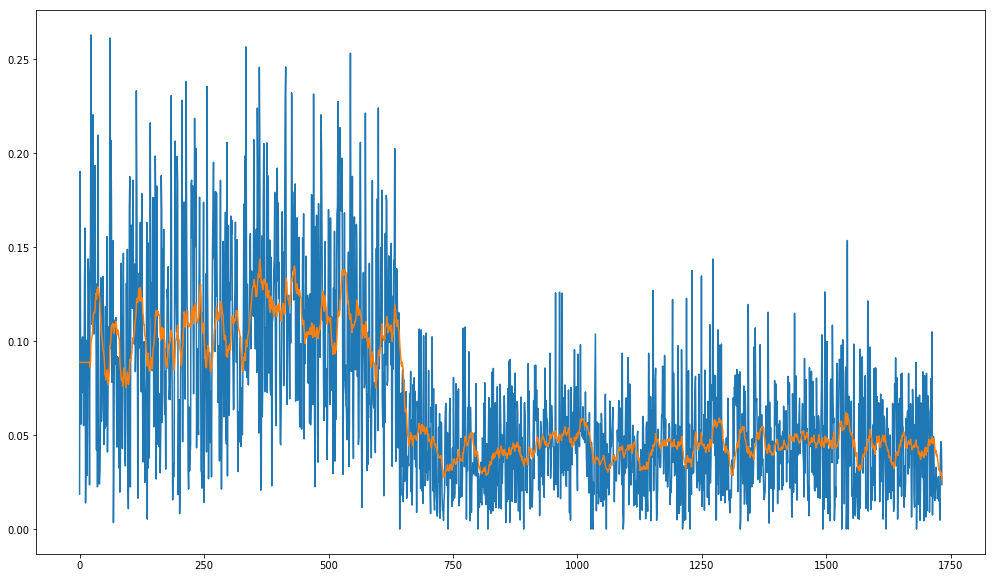

In [173]:
plt.figure(figsize=(17,10))
plt.plot(cos_m[0][1:])
plt.plot(rolling_mean(cos_m[0][1:]))

Можно усреднить близость к нескольким документам

In [174]:
cos_m = cosine_similarity(matrix[0:5], matrix[5:])
cos_m.shape

(5, 1729)

In [175]:
cos_m.sum(axis=0).shape

(1729,)

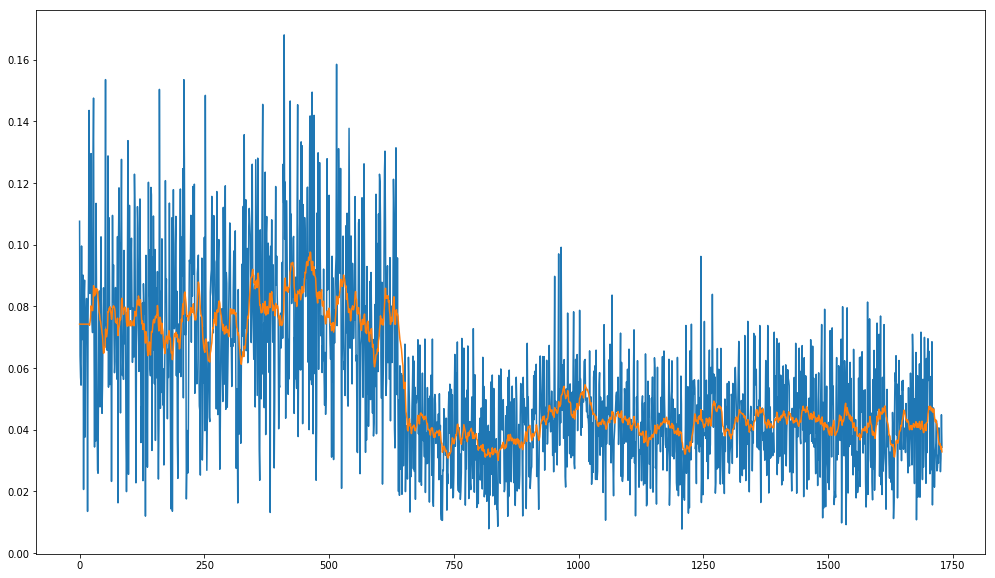

In [176]:
plt.figure(figsize=(17,10))
plt.plot(cos_m.sum(axis=0)/5)
plt.plot(rolling_mean(cos_m.sum(axis=0)/5));

In [ ]:
# import zipfile
# zip_ref = zipfile.ZipFile('vac_dicts.zip', 'r')
# zip_ref.extractall()
# zip_ref.close()

Добавим отрицательных примеров

In [194]:
nn = 10
cos_m_pos = cosine_similarity(matrix[:nn], matrix[nn:-nn])
cos_m_neg = cosine_similarity(matrix[-nn:], matrix[nn:-nn])

In [178]:
cos_m_neg.shape

(10, 1714)

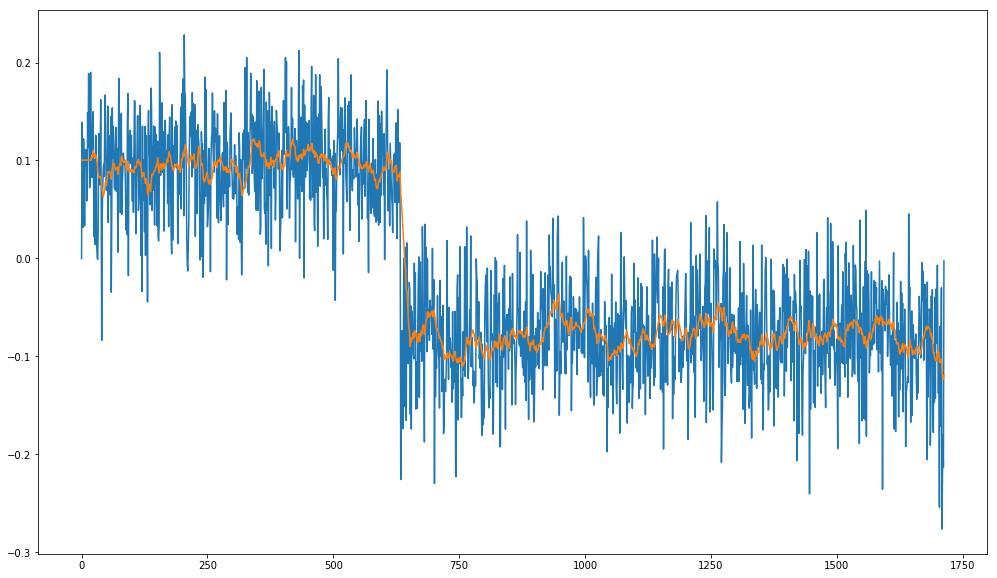

In [179]:
plt.figure(figsize=(17,10))
plt.plot(cos_m_pos.sum(axis=0)/5 - cos_m_neg.sum(axis=0)/5)
plt.plot(rolling_mean(cos_m_pos.sum(axis=0)/5 - cos_m_neg.sum(axis=0)/5));

Посмотрим внимательнее на минимум

In [ ]:
cos_m[0][len(data[0]):].argmin()

In [ ]:
texts[len(data[0]) + 2]

In [ ]:
ind1 = [0,1,2,3,178]
ind2 = [2030, 3996, 3997, 3998, 3999]
inv = list(set(range(4000)) - set(ind1) - set(ind2))

In [ ]:
cos_m_pos = cosine_similarity(matrix[ind1], matrix[inv])
cos_m_neg = cosine_similarity(matrix[ind2], matrix[inv])

In [ ]:
plt.figure(figsize=(17,10))
plt.plot(cos_m_pos.sum(axis=0)/5 - cos_m_neg.sum(axis=0)/5)

# Интерпретация

In [197]:
arr = cos_m_pos.sum(axis=0)/nn - cos_m_neg.sum(axis=0)/nn

In [198]:
# Новостей культуры
arr_it = arr[:len(data[0])]
len(arr_it[arr_it > 0]), len(arr_it[arr_it > 0])/len(data[0])

(616, 0.9565217391304348)

In [199]:
arr_it = arr[len(data[0]):]
len(arr_it[arr_it < 0]), len(arr_it[arr_it < 0])/len(data[1])

(1007, 0.9238532110091743)